<a href="https://colab.research.google.com/github/diya1094/Celebal-Technologies/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
file_path = "/content/drive/MyDrive/Celebal/train.csv"
df = pd.read_csv(file_path)

In [9]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

#Dropped the column Id
dataset_df = df.drop('Id', axis=1)

print(dataset_df.head())
print(dataset_df.info())
print(dataset_df.isnull().sum())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  Grvl      Reg   
1          20       RL         80.0     9600   Pave  Grvl      Reg   
2          60       RL         68.0    11250   Pave  Grvl      IR1   
3          70       RL         60.0     9550   Pave  Grvl      IR1   
4          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1         Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   
2         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
3         Lvl    AllPub    Corner  ...        0     Gd  MnPrv        Shed   
4         Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal    

In [12]:
print(dataset_df.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   180.569112   456.098091   161.319273  ..

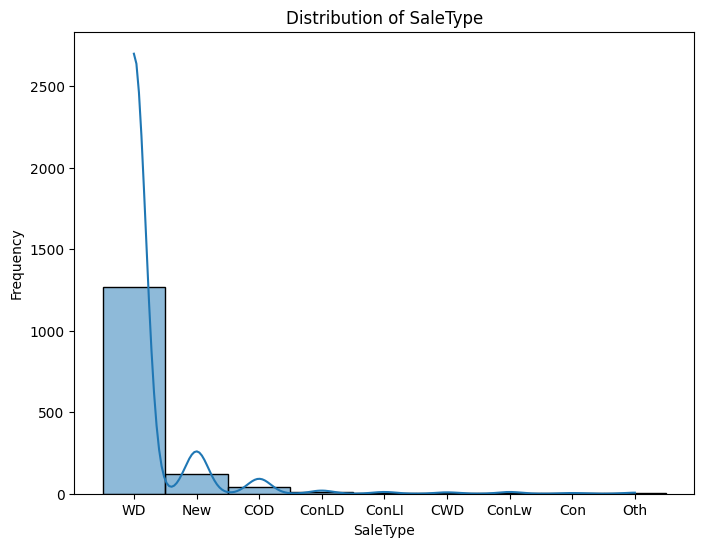

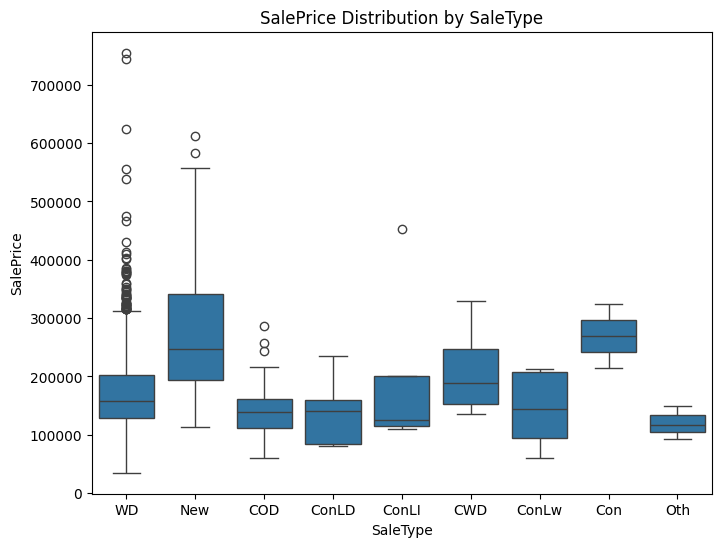

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset_df, x='SaleType', kde=True)
plt.title('Distribution of SaleType')
plt.xlabel('SaleType')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset_df, x='SaleType', y='SalePrice')
plt.title('SalePrice Distribution by SaleType')
plt.xlabel('SaleType')
plt.ylabel('SalePrice')
plt.show()

In [28]:
file_path_test = "/content/drive/MyDrive/Celebal/test.csv"
df_test = pd.read_csv(file_path_test)
for col in df_test.columns:
    if df_test[col].dtype in ['int64', 'float64']:
        df_test[col] = df_test[col].fillna(df_test[col].mean())
    else:
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
df_test = df_test.drop('Id', axis=1)

X_test_processed = pd.get_dummies(df_test, drop_first=True)

train_cols = X_train.columns
test_cols = X_test_processed.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_processed[c] = 0
X_test_processed = X_test_processed[train_cols]

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

test_predictions_rf = rf_model.predict(X_test_processed)

print("First 5 predictions on the test set using Random Forest:")
print(test_predictions_rf[:5])

First 5 predictions on the test set using Random Forest:
[128927.5  151095.   178661.38 188307.84 206937.12]
